<a href="https://colab.research.google.com/github/casualcomputer/accounting_fraud/blob/master/rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

data_url = "https://raw.githubusercontent.com/casualcomputer/accounting_fraud/master/uscecchini28.csv"
df = pd.read_csv(data_url, error_bad_lines=False)


In [2]:
# different companies
list(df['gvkey'].unique())

[1009,
 1011,
 1017,
 1021,
 1028,
 1034,
 1036,
 1043,
 1045,
 1050,
 1054,
 1056,
 1058,
 1065,
 1073,
 1075,
 1078,
 1081,
 1082,
 1094,
 1095,
 1096,
 1098,
 1099,
 1104,
 1108,
 1109,
 1111,
 1115,
 1116,
 1117,
 1121,
 1128,
 1137,
 1138,
 1141,
 1151,
 1154,
 1155,
 1161,
 1164,
 1166,
 1171,
 1173,
 1181,
 1186,
 1189,
 1197,
 1203,
 1208,
 1209,
 1210,
 1212,
 1213,
 1228,
 1230,
 1231,
 1234,
 1235,
 1238,
 1239,
 1240,
 1243,
 1244,
 1245,
 1250,
 1253,
 1254,
 1255,
 1257,
 1260,
 1262,
 1264,
 1266,
 1279,
 1281,
 1283,
 1286,
 1297,
 1300,
 1311,
 1318,
 1324,
 1327,
 1328,
 1331,
 1334,
 1351,
 1356,
 1359,
 1360,
 1365,
 1372,
 1380,
 1382,
 1392,
 1397,
 1410,
 1411,
 1430,
 1431,
 1439,
 1440,
 1441,
 1444,
 1446,
 1462,
 1468,
 1470,
 1472,
 1475,
 1485,
 1491,
 1494,
 1495,
 1496,
 1497,
 1498,
 1500,
 1506,
 1511,
 1513,
 1523,
 1527,
 1530,
 1532,
 1533,
 1537,
 1539,
 1542,
 1543,
 1544,
 1546,
 1554,
 1560,
 1564,
 1573,
 1577,
 1581,
 1585,
 1586,
 1587,
 1593,

In [3]:
start_year = df['fyear'].min()
end_year = df['fyear'].max()

print(start_year, end_year)

1990 2014


In [4]:
company1234 = df[df['gvkey']==1234]
company1234 = company1234[['fyear', 'act']]

In [6]:
company1234

,fyear,act
57,1990,16.531
4639,1991,21.123
9343,1992,23.232
14307,1993,23.520
19684,1994,12.666
31595,1996,24.323
51840,1999,18.702
65418,2001,20.678
95621,2006,30.658
101526,2007,32.609


In [7]:
# 
start_year = 1990
end_year = 2014

left_df = pd.DataFrame({'fyear': range(start_year, end_year+1)})
left_df_imputed_missing = left_df.merge(company1234, on='fyear', how='left')
left_df_imputed_missing.loc[left_df_imputed_missing['act'].isnull(),'act'] = 0
  

In [19]:
left_df_imputed_missing

,fyear,act
0,1990,16.531
1,1991,21.123
2,1992,23.232
3,1993,23.520
4,1994,12.666
5,1995,0.000
6,1996,24.323
7,1997,0.000
8,1998,0.000
9,1999,18.702


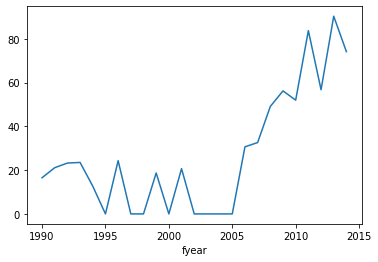

In [8]:
from matplotlib import pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()
left_df_imputed_missing.set_index('fyear').plot(legend=False,ax=ax)